[1] "0DPA"  "5DPA"  "10DPA" "20DPA"

,chr,contact,tags,days,position,sigs
,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>
1,Gbar_A01,8627794,short,0DPA,one,poor
2,Gbar_A02,8430029,short,0DPA,one,poor
3,Gbar_A03,5052239,short,0DPA,one,poor
4,Gbar_A04,4081523,short,0DPA,one,poor
5,Gbar_A05,6589322,short,0DPA,one,poor
6,Gbar_A06,6747113,short,0DPA,one,poor


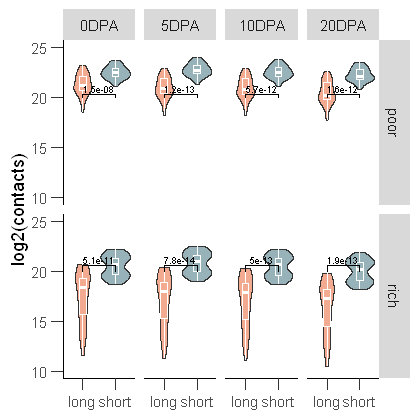

In [29]:
## 分析rich region 和poor region的compartness 
options(repr.plot.width=3.5,repr.plot.height=3.5)
rm(list = ls())
setwd('F:/fiber/airticle/GB_modification/SVL')
library(ggplot2)
library(ggpubr)
df <- read.csv('all_day_poor_rich_SVL_new.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("0DPA", "5DPA", "10DPA", "20DPA")))
with(df, levels(days))
head(df)
tg <- list(c('short', 'long'))
fg <- ggplot(df, aes(x=tags, y=log2(contact), fill=tags))+
geom_violin()+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=0.2, color = 'white')+
labs(x=NULL, y='log2(contacts)')+
facet_grid(sigs~days, scales = "free")+
coord_cartesian(ylim = c(10, 25)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm')
     )+
geom_signif(comparisons = tg, step_increase = 0.1,test =wilcox.test, tip_length=0.05, y_position=c(20), textsize = 2)+
scale_fill_manual(values=c('#f2ab91', "#98b2ba"))
fg
ggsave(plot =fg, filename = '100k_subg_poor.pdf', height =4, width = 4,  dpi = 300)